In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/Mall_Customers (1).csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


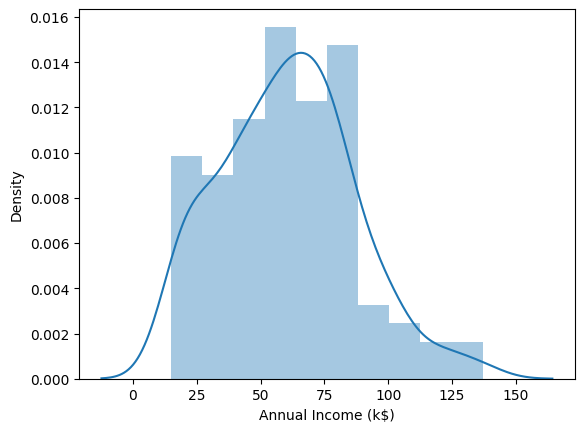

In [5]:
sns.distplot(df['Annual Income (k$)']);

In [6]:
df.columns


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

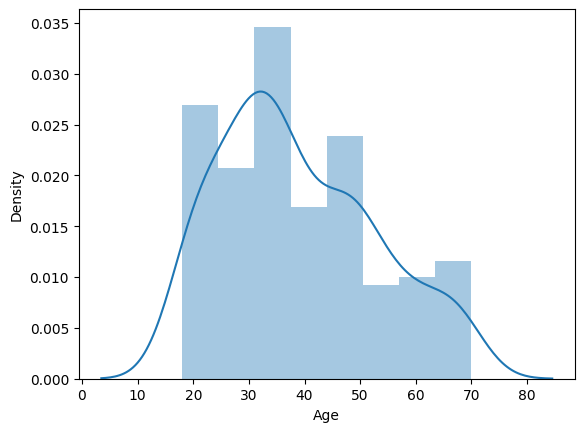

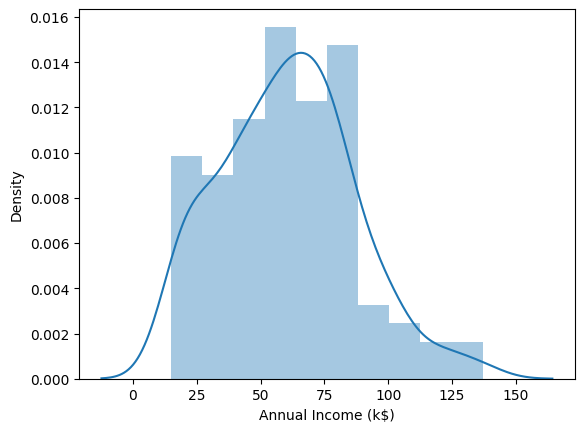

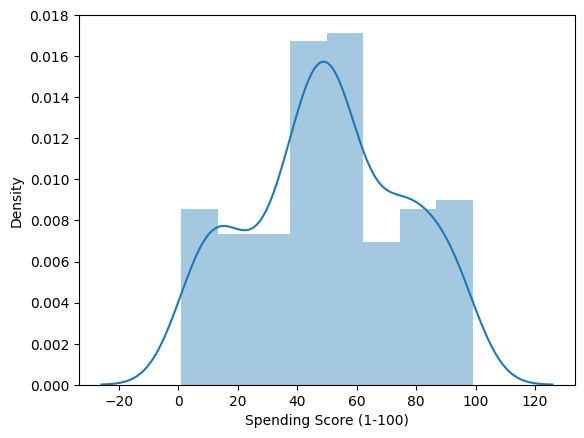

In [7]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

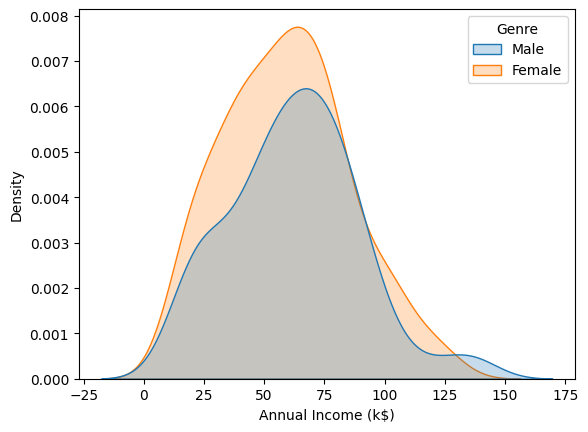

In [13]:
sns.kdeplot(
    data=df,
    x='Annual Income (k$)',
    hue='Genre',
    fill=True
)

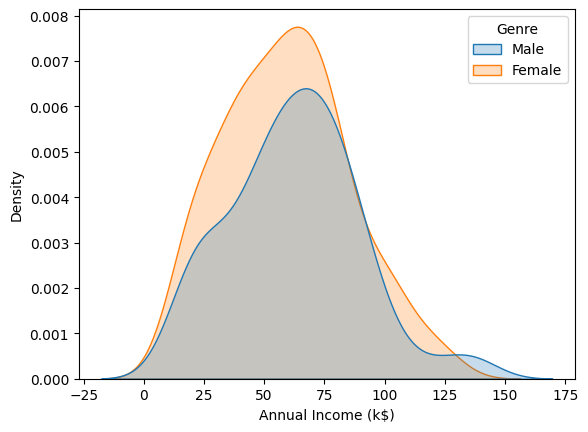

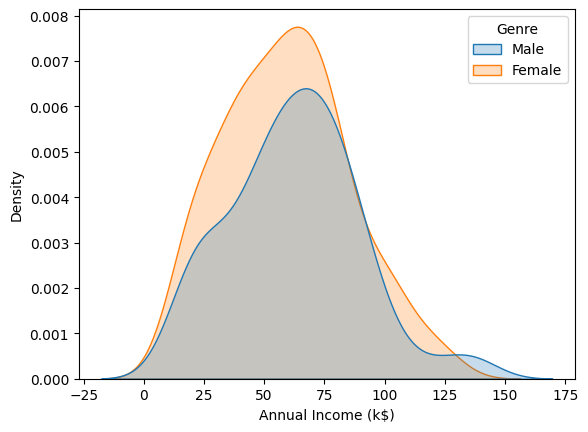

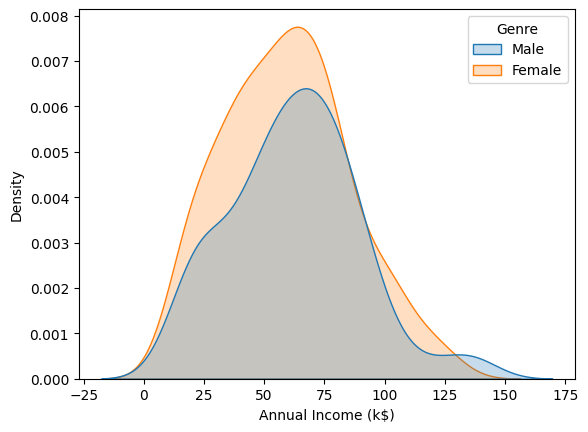

In [18]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x='Annual Income (k$)', hue='Genre', fill=True)

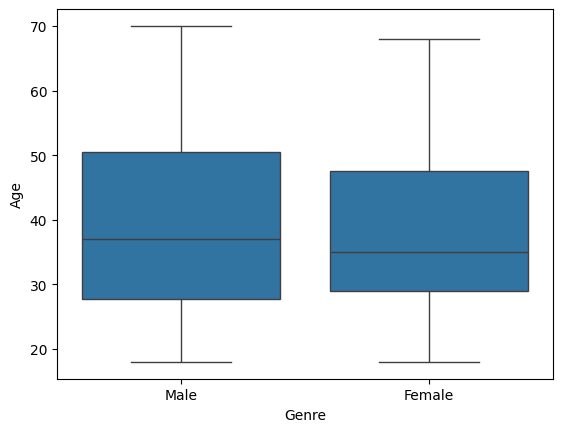

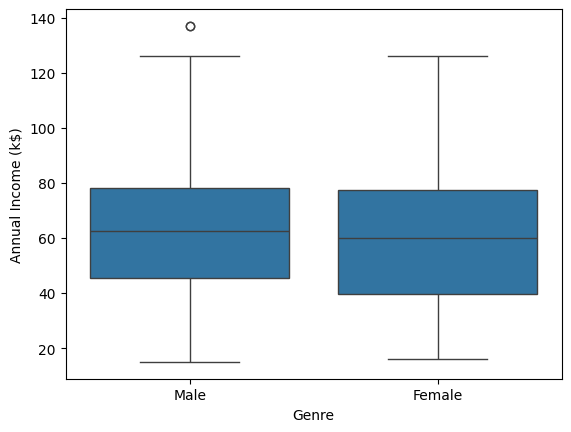

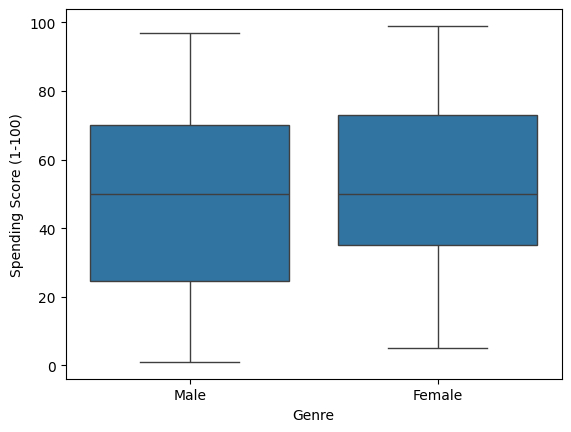

In [20]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Genre',y=df[i])

In [21]:
df['Genre'].value_counts(normalize=True)

,proportion
Genre,
Female,0.56
Male,0.44


# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

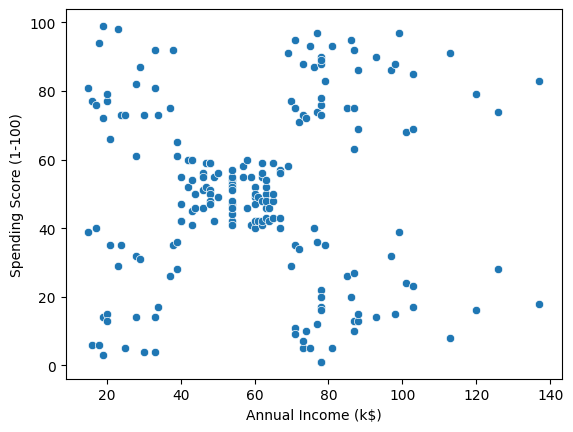

In [22]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

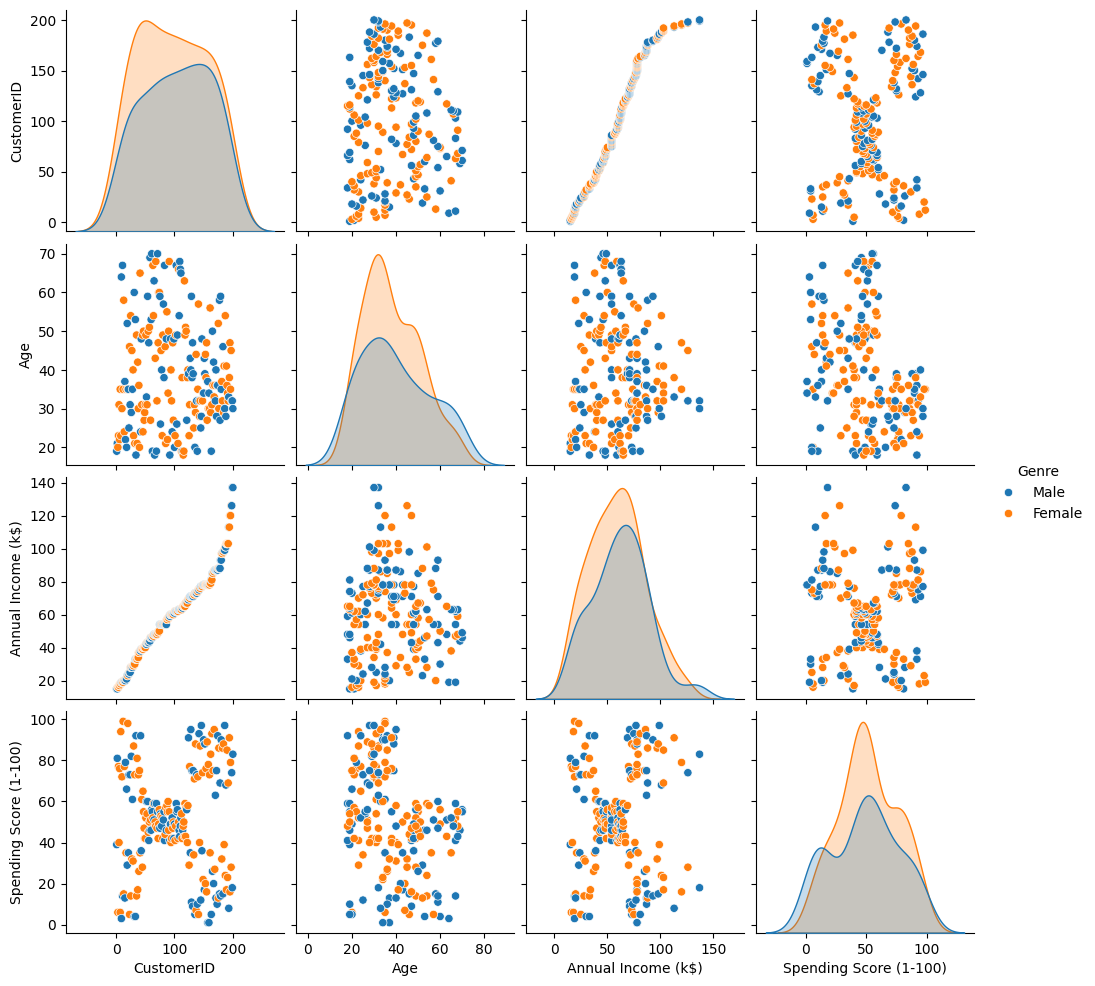

In [24]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Genre')

In [26]:
df.groupby('Genre')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [28]:
df.select_dtypes(include=['int64', 'float64']).corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


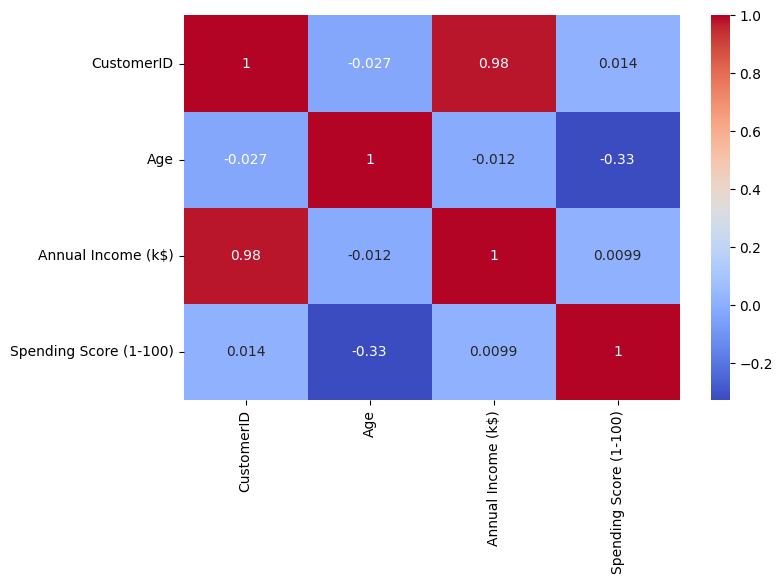

In [31]:
num_df = df.select_dtypes(include='number')

plt.figure(figsize=(8,5))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.show()


# Clustering - Univariate, Bivariate, Multivariate

In [32]:
clustering1 = KMeans(n_clusters=3)

In [33]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [34]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [35]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [36]:
df['Income Cluster'].value_counts()

,count
Income Cluster,
2,92
1,86
0,22


In [37]:
clustering1.inertia_

25341.285871863212

In [38]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [39]:
intertia_scores

[137277.2800000002,
 48660.88888888887,
 25640.457784396807,
 13278.112713472474,
 9384.572427572422,
 5050.904761904766,
 4078.8715728715724,
 2959.9549062049077,
 2305.4567226890767,
 2117.392372333549]

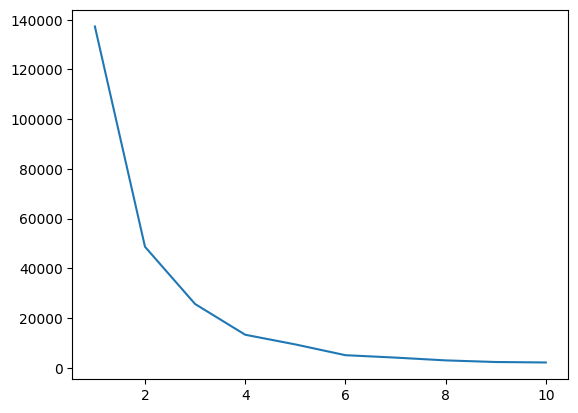

In [40]:
plt.plot(range(1,11),intertia_scores)

In [41]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [43]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.545455,108.181818,52.000000
1,40.023256,36.348837,50.081395
2,38.065217,71.804348,49.880435


In [45]:
#Bivariate Clustering

In [44]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,0


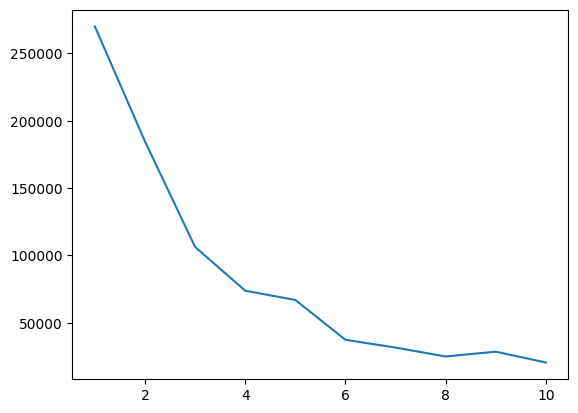

In [46]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [47]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

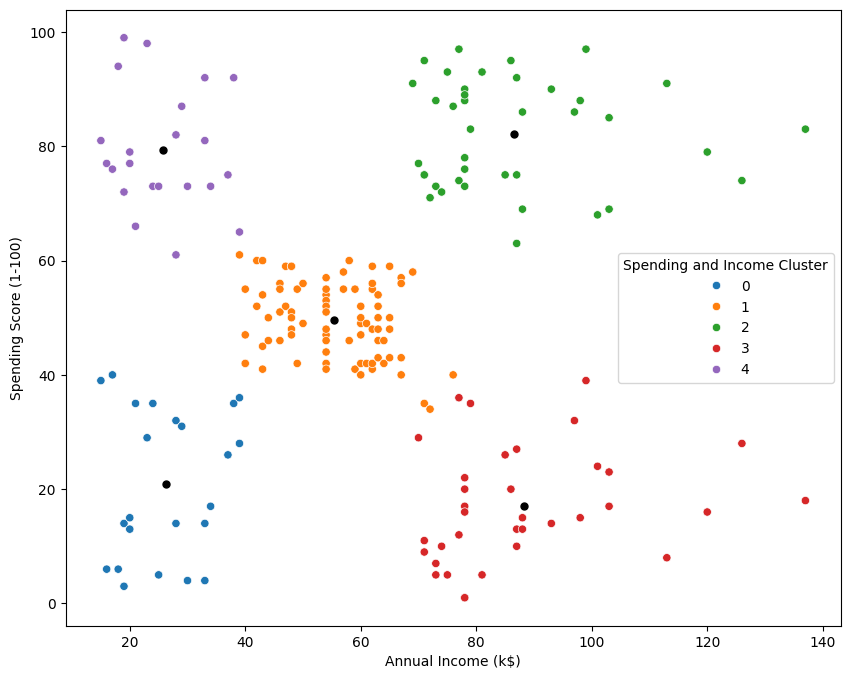

In [51]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='.')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [52]:
pd.crosstab(df['Spending and Income Cluster'],df['Genre'],normalize='index')

Genre,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.592593,0.407407
2,0.538462,0.461538
3,0.457143,0.542857
4,0.590909,0.409091


In [54]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,25.272727,25.727273,79.363636


In [55]:
#mulivariate clustering
from sklearn.preprocessing import StandardScaler

In [56]:
scale = StandardScaler()

In [57]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,0


In [58]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Genre_Male
0,1,19,15,39,1,0,True
1,2,21,15,81,1,4,True
2,3,20,16,6,1,0,False
3,4,23,16,77,1,4,False
4,5,31,17,40,1,0,False


In [59]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Genre_Male'],
      dtype='object')

In [62]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Genre_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [63]:
dff = scale.fit_transform(dff)

In [64]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


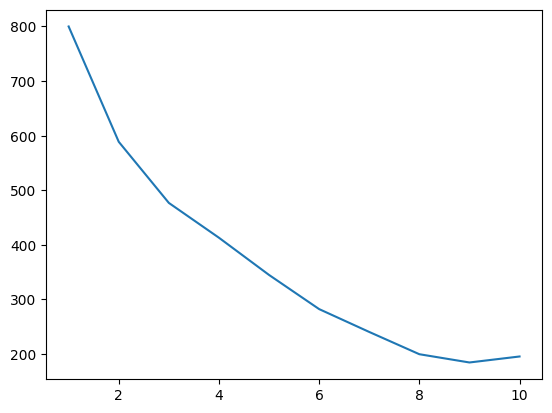

In [65]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [66]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,2
196,197,Female,45,126,28,0,3
197,198,Male,32,126,74,0,2
198,199,Male,32,137,18,0,3


In [67]:
df.to_csv('Clustering.csv')